<a href="https://colab.research.google.com/github/Ilia-Gershen/TYP-project/blob/main/ExperimentWithModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Models LSTM-GRU

Searching for the best input shape for deep learning models for Cryptocurrency  price prediction

Choosing between the input shape of
*   One week (1to1)
*   Two weeks (2to1)
*   Three weeks (3to1)
*   Four weeks (4to1)

The models performance is going to be validated by RMSE and MAPE metrics 




#### Importing libraries and dataset

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive #connecting google drive with Database of the project
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the csv made in data preprocessing stage
ETH = pd.read_csv("/content/drive/MyDrive/Database/ETH-preprocessed.csv")
#ETH.sort_values(by = 'Date', ascending = False, inplace = True) #sorting it so on the top are the most recent dates
ETH.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2017-11-19,347.401001,371.290985,344.739990,354.385986,354.385986,1.181530e+09
1,1,2017-11-20,354.093994,372.136993,353.289001,366.730011,366.730011,8.070270e+08
2,2,2017-11-21,367.442993,372.470001,350.692993,360.401001,360.401001,9.499120e+08
3,3,2017-11-22,360.312012,381.420013,360.147003,380.652008,380.652008,8.008190e+08
4,4,2017-11-23,381.438995,425.548004,376.088013,410.165985,410.165985,1.845680e+09


#### Deviding data into Training Validation and Testing

In [4]:
def DatasetFor1to1(Data, Date): #function for creation of traning and testing datasets for the models

  #Data for Training 
  #From 2018 to 2022
  Train_Data = Data['Close'][Data['Date'] < '2021-12-30'].to_numpy() #taking data befor the given date
  TrainingData = []
  TrainingDataX = []
  TrainingDataY = []

  for i in range(0, len(Train_Data), 7): #putting in close values data in form of weeks aka 7 days
    try:
      TrainingData.append(Train_Data[i : i+7]) #array of arrays of 7 close prices
    except:
      pass

  if len(TrainingData[-1]) < 7: #If last week is less then 7 days we remove last week
    TrainingData.pop(-1)

  TrainingDataX = TrainingData[0 : -1] # taking all but last element
  TrainingDataX = np.array(TrainingDataX)
  TrainingDataX = TrainingDataX.reshape((-1, 7, 1)) #split into groups of 7 

  
  TrainingDataY = TrainingData[1:len(TrainingData)] # Taking all but first element
  TrainingDataY = np.array(TrainingDataY)
  TrainingDataY = TrainingDataY.reshape((-1, 7, 1)) # split into groups of 7 and keep the order

  # So in the end x is all previous weeks and y is all next weeks 

  #Data for Validation
  #From 2022 to 2022-06
  Val_Data = Data['Close'][(Data['Date'] >= '2022-01-01') & (Data['Date'] < '2022-06-01')].to_numpy() #taking data from given date to latest date
  ValData = []
  ValDataX = []
  ValDataY = []

  for i in range(0, len(Val_Data), 7):
    try:
      ValData.append(Val_Data[i : i + 7])
    except:
      pass

  if len(ValData[-1]) < 7:
    ValData.pop(-1)

  ValDataX = ValData[0 : -1]
  ValDataX = np.array(ValDataX)
  ValDataX = ValDataX.reshape((-1, 7, 1))

  ValDataY = ValData[1 : len(ValData)]
  ValDataY = np.array(ValDataY)
  ValDataY = ValDataY.reshape((-1, 7, 1))

  #Data for Testing 
  #From 2022-06 to the end

  Test_Data = Data['Close'][Data['Date'] >= '2022-06-02'].to_numpy()
  TestData = []
  TestDataX = []
  TestDataY = []

  for i in range(0, len(Test_Data), 7):
    try:
      TestData.append(Test_Data[i : i+7])
    except:
      pass

  if len(TestData[-1]) < 7:
    TestData.pop(-1)

  TestDataX = TestData[0 : -1]
  TestDataX = np.array(TestDataX)
  TestDataX = TestDataX.reshape((-1, 7, 1))

  TestDataY = TestData[1 : len(TestData)]
  TestDataY = np.array(TestDataY)
  TestDataY = TestDataY.reshape((-1, 7, 1))
 
  return TrainingDataX, TrainingDataY, ValDataX, ValDataY, TestDataX, TestDataY


In [5]:
def DatasetFor2to1(Data, Date): #function for creation of traning and testing datasets for the models

  #Data for Training 
  #From 2018 to 2022
  Train_Data = Data['Close'][Data['Date'] < '2021-12-30'].to_numpy() #taking data befor the given date
  TrainingData = []
  TrainingDataX = []
  TrainingDataY = []

  #making it for 14 days

  #check if devidable by 3 and if not -1
  #Train_Data = np.delete(Train_Data, [0, 1, 2, 3,4,5,6,7,8,9,10])
  Train_Data = np.delete(Train_Data, 0)
  

  #could also take for x i-7 to get the y week and then i+7 to get hole week
  #for y take i+7 and i+14, 
  #so the step in that case is going to be 2 weeks not 3!!!!!!
  for i in range(0, len(Train_Data), 21): #putting in close values data in form of weeks aka 7 days
    try:
      TrainingDataX.append(Train_Data[i : i+14]) #array of arrays of 7 close prices
    except:
      TrainingDataX.pop(-1)
      pass
    try:
      TrainingDataY.append(Train_Data[i+14:i+14+7])
    except:
      TrainingDataX.pop(-1)
      TrainingDataY.pop(-1)
      pass

  if len(TrainingDataX[-1]) < 14:
    TrainingDataX.pop(-1)

  if len(TrainingDataY[-1]) < 7:
    TrainingDataY.pop(-1)

  TrainingDataX = np.array(TrainingDataX)
  #print(TrainingDataX)
  #cannot reshape 72 into 14???? wtf
  TrainingDataX = TrainingDataX.reshape((-1, 14, 1))
  TrainingDataY = np.array(TrainingDataY)
  TrainingDataY = TrainingDataY.reshape((-1, 7, 1))

    # So in the end x is all previous weeks and y is all next weeks 

    #Data for Validation
    #From 2022 to 2022-06
  Val_Data = Data['Close'][(Data['Date'] >= '2022-01-03') & (Data['Date'] < '2022-05-30')].to_numpy() #taking data from given date to latest date
  ValData = []
  ValDataX = []
  ValDataY = []

  #was 151 now should be 147 to be devidable by 21 so it can be split into 3 weeks groups

  for i in range(0, len(Val_Data), 21): #putting in close values data in form of weeks aka 7 days
    try:
      ValDataX.append(Val_Data[i : i+14]) #array of arrays of 7 close prices
    except:
      ValDataX.pop(-1)
      pass
    try:
      ValDataY.append(Val_Data[i+14:i+14+7])
    except:
      ValDataX.pop(-1)
      ValDataY.pop(-1)
      pass

  if len(ValDataX[-1]) < 14:
    ValDataX.pop(-1)

  if len(ValDataY[-1]) < 7:
    ValDataY.pop(-1)

  ValDataX = np.array(ValDataX)
  ValDataX = ValDataX.reshape((-1, 14, 1))
  ValDataY = np.array(ValDataY)
  ValDataY = ValDataY.reshape((-1, 7, 1))

    #Data for Testing 
    #From 2022-06 to the end

  Test_Data = Data['Close'][Data['Date'] >= '2022-06-06'].to_numpy()
  TestData = []
  TestDataX = []
  TestDataY = []

  for i in range(0, len(Test_Data), 21): #putting in close values data in form of weeks aka 7 days
    try:
      TestDataX.append(Test_Data[i : i+14]) #array of arrays of 7 close prices
    except:
      TestDataX.pop(-1)
      pass
    try:
      TestDataY.append(Test_Data[i+14:i+14+7])
    except:
      TestDataX.pop(-1)
      TestDataY.pop(-1)
      pass

  if len(TestDataX[-1]) < 14:
    TestDataX.pop(-1)

  if len(TestDataY[-1]) < 7:
    TestDataY.pop(-1)

  TestDataX.pop(-1)

  TestDataX = np.array(TestDataX)
  TestDataX = TestDataX.reshape((-1, 14, 1))
  TestDataY = np.array(TestDataY)
  TestDataY = TestDataY.reshape((-1, 7, 1))

  return TrainingDataX, TrainingDataY, ValDataX, ValDataY, TestDataX, TestDataY

In [20]:
def DatasetFor3to1(Data, Date):

  Train_Data = Data['Close'][Data['Date'] < '2021-12-30'].to_numpy() #taking data befor the given date
  TrainingData = []
  TrainingDataX = []
  TrainingDataY = []

  Train_Data = np.delete(Train_Data, 0)

  #could also take for x i-7 to get the y week and then i+7 to get hole week
  #for y take i+7 and i+14, 
  #so the step in that case is going to be 2 weeks not 3!!!!!!
  for i in range(0, len(Train_Data), 28): #putting in close values data in form of weeks aka 7 days
    
    try:
      TrainingDataX.append(Train_Data[i : i+21]) #array of arrays of 7 close prices
    except:
      TrainingDataX.pop(-1)
      pass
    try:
      TrainingDataY.append(Train_Data[i+21:i+21+7])
    except:
      TrainingDataX.pop(-1)
      TrainingDataY.pop(-1)
      pass

  if len(TrainingDataX[-1]) < 21:
    TrainingDataX.pop(-1)

  if len(TrainingDataY[-1]) < 7:
    TrainingDataY.pop(-1)

  TrainingDataX = np.array(TrainingDataX)
  TrainingDataX = TrainingDataX.reshape((-1, 21, 1))
  TrainingDataY = np.array(TrainingDataY)
  TrainingDataY = TrainingDataY.reshape((-1, 7, 1))

    #Data for Validation
    #From 2022 to 2022-06
  Val_Data = Data['Close'][(Data['Date'] >= '2022-01-01') & (Data['Date'] < '2022-06-01')].to_numpy() #taking data from given date to latest date
  ValData = []
  ValDataX = []
  ValDataY = []

  #was 151 now should be 147 to be devidable by 21 so it can be split into 3 weeks groups
  for i in range(11):
    Val_Data = np.delete(Val_Data, 0)
  #Val_Data = np.delete(Val_Data, [0,1,2,3])

  for i in range(0, len(Val_Data), 28): #putting in close values data in form of weeks aka 7 days
    try:
      ValDataX.append(Val_Data[i : i+21]) #array of arrays of 7 close prices
    except:
      ValDataX.pop(-1)
      pass
    try:
      ValDataY.append(Val_Data[i+21:i+21+7])
    except:
      ValDataX.pop(-1)
      ValDataY.pop(-1)
      pass

  if len(ValDataX[-1]) < 21:
    ValDataX.pop(-1)

  if len(ValDataY[-1]) < 7:
    ValDataY.pop(-1)

  ValDataX = np.array(ValDataX)
  ValDataX = ValDataX.reshape((-1, 21, 1))
  ValDataY = np.array(ValDataY)
  ValDataY = ValDataY.reshape((-1, 7, 1))

    #Data for Testing 
    #From 2022-06 to the end

  Test_Data = Data['Close'][Data['Date'] >= '2022-06-02'].to_numpy()
  TestData = []
  TestDataX = []
  TestDataY = []

  for i in range(3):
    Test_Data = np.delete(Test_Data, 0)
  #Test_Data = np.delete(Test_Data, [0,1,2])

  for i in range(0, len(Test_Data), 28): #putting in close values data in form of weeks aka 7 days
    try:
      TestDataX.append(Test_Data[i : i+21]) #array of arrays of 7 close prices
    except:
      TestDataX.pop(-1)
      pass
    try:
      TestDataY.append(Test_Data[i+21:i+21+7])
    except:
      TestDataX.pop(-1)
      TestDataY.pop(-1)
      pass

  if len(TestDataX[-1]) < 21:
    TestDataX.pop(-1)

  if len(TestDataY[-1]) < 7:
    TestDataY.pop(-1)

  TestDataX = np.array(TestDataX)
  TestDataX = TestDataX.reshape((-1, 21, 1))
  TestDataY = np.array(TestDataY)
  TestDataY = TestDataY.reshape((-1, 7, 1))

  return TrainingDataX, TrainingDataY, ValDataX, ValDataY, TestDataX, TestDataY

In [7]:
def DatasetFor4to1(Data, Date):

  Train_Data = Data['Close'][Data['Date'] < '2021-12-30'].to_numpy() #taking data befor the given date
  TrainingData = []
  TrainingDataX = []
  TrainingDataY = []

  Train_Data = np.delete(Train_Data, 0)

  #could also take for x i-7 to get the y week and then i+7 to get hole week
  #for y take i+7 and i+14, 
  #so the step in that case is going to be 2 weeks not 3!!!!!!
  for i in range(0, len(Train_Data), 35): #putting in close values data in form of weeks aka 7 days
    try:
      TrainingDataX.append(Train_Data[i : i+28]) #array of arrays of 7 close prices
      TrainingDataY.append(Train_Data[i+28:i+28+7])
    except:
      pass

  if len(TrainingDataX[-1]) < 28:
    TrainingDataX.pop(-1)

  if len(TrainingDataY[-1]) < 7:
    TrainingDataY.pop(-1)
    TrainingDataX.pop(-1)

  TrainingDataX = np.array(TrainingDataX)
  TrainingDataX = TrainingDataX.reshape((-1, 28, 1))
  TrainingDataY = np.array(TrainingDataY)
  TrainingDataY = TrainingDataY.reshape((-1, 7, 1))

    #Data for Validation
    #From 2022 to 2022-06
  Val_Data = Data['Close'][(Data['Date'] >= '2022-01-01') & (Data['Date'] < '2022-06-01')].to_numpy() #taking data from given date to latest date
  ValData = []
  ValDataX = []
  ValDataY = []
 

  for i in range(0, len(Val_Data), 35): #putting in close values data in form of weeks aka 7 days
    try:
      ValDataX.append(Val_Data[i : i+28]) #array of arrays of 7 close prices
      ValDataY.append(Val_Data[i+28:i+28+7])
    except:
      pass


  if len(ValDataY[-1]) < 7:
    ValDataY.pop(-1)
    ValDataX.pop(-1)

  ValDataX = np.array(ValDataX)
  ValDataX = ValDataX.reshape((-1, 28, 1))
  ValDataY = np.array(ValDataY)
  ValDataY = ValDataY.reshape((-1, 7, 1))

    #Data for Testing 
    #From 2022-06 to the end

  Test_Data = Data['Close'][Data['Date'] >= '2022-06-02'].to_numpy()
  TestData = []
  TestDataX = []
  TestDataY = []

  for i in range(0, len(Test_Data), 35): #putting in close values data in form of weeks aka 7 days
    try:
      TestDataX.append(Test_Data[i : i+28]) #array of arrays of 7 close prices
      TestDataY.append(Test_Data[i+28:i+28+7])
    except:
      pass

  if len(TestDataX[-1]) < 28:
    TestDataX.pop(-1)

  if len(TestDataY[-1]) < 7:
    TestDataY.pop(-1)
    TestDataX.pop(-1)

  TestDataX = np.array(TestDataX)
  TestDataX = TestDataX.reshape((-1, 28, 1))
  TestDataY = np.array(TestDataY)
  TestDataY = TestDataY.reshape((-1, 7, 1))

  return TrainingDataX, TrainingDataY, ValDataX, ValDataY, TestDataX, TestDataY

#### Creating Models LSTM-GRU

In [36]:
def Model1to1():

  model = tf.keras.models.Sequential([ #input shape first number is number of days we will predict and second one is number of purumenters use for prediction
      tf.keras.layers.LSTM(200, input_shape = (7,1), activation = tf.nn.leaky_relu, return_sequences = True),
      tf.keras.layers.GRU(200, activation = tf.nn.leaky_relu), #or make in 150 if it will not work
      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
      tf.keras.layers.Dense(7, activation = tf.nn.leaky_relu)
  ])

  return model

In [8]:
def Model2to1():

  model = tf.keras.models.Sequential([
      tf.keras.layers.LSTM(200, input_shape = (14,1), activation = tf.nn.leaky_relu, return_sequences = True),
      tf.keras.layers.GRU(200, activation = tf.nn.leaky_relu), #or make in 150 if it will not work
      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
      tf.keras.layers.Dense(7, activation = tf.nn.leaky_relu)
  ])

  return model

In [9]:
def Model3to1():

  model = tf.keras.models.Sequential([
      tf.keras.layers.LSTM(200, input_shape = (21,1), activation = tf.nn.leaky_relu, return_sequences = True),
      tf.keras.layers.GRU(200, activation = tf.nn.leaky_relu), #or make in 150 if it will not work
      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
      tf.keras.layers.Dense(7, activation = tf.nn.leaky_relu)
  ])

  return model

In [10]:
def Model4to1():
  model = tf.keras.models.Sequential([
      tf.keras.layers.LSTM(200, input_shape = (28,1), activation = tf.nn.leaky_relu, return_sequences = True),
      tf.keras.layers.GRU(200, activation = tf.nn.leaky_relu), #or make in 150 if it will not work
      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
      tf.keras.layers.Dense(7, activation = tf.nn.leaky_relu)
  ])
  return model

In [11]:
model2to1 = Model2to1()
model3to1 = Model3to1()
model4to1 = Model4to1()

#### Model 1 to 1

In [40]:
def scheduler1to1(epoch):
  if epoch <= 100:
    lrate = epoch * (10 ** -6)
  else:
    lrate = 0.00001

  return lrate

callback = tf.keras.callbacks.LearningRateScheduler(scheduler1to1)

ETH_Train_X, ETH_Train_Y, ETH_Val_X, ETH_Val_Y, ETH_Test_X, ETH_Test_Y = DatasetFor1to1(ETH, '2021-11-20')

ETH1to1Model = Model1to1()
ETH1to1Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())
ETH1to1Hist = ETH1to1Model.fit(ETH_Train_X, ETH_Train_Y, epochs = 200, validation_data = (ETH_Val_X, ETH_Val_Y), callbacks = [callback])

Epoch 1/200
7/7 [==============================] - 3s 104ms/step - loss: 2140153.5000 - root_mean_squared_error: 1462.9263 - val_loss: 7735710.5000 - val_root_mean_squared_error: 2781.3145 - lr: 0.0000e+00
Epoch 2/200
7/7 [==============================] - 0s 38ms/step - loss: 2139850.2500 - root_mean_squared_error: 1462.8228 - val_loss: 7733257.5000 - val_root_mean_squared_error: 2780.8735 - lr: 1.0000e-06
Epoch 3/200
7/7 [==============================] - 0s 40ms/step - loss: 2138926.5000 - root_mean_squared_error: 1462.5070 - val_loss: 7727904.0000 - val_root_mean_squared_error: 2779.9109 - lr: 2.0000e-06
Epoch 4/200
7/7 [==============================] - 0s 42ms/step - loss: 2137396.0000 - root_mean_squared_error: 1461.9836 - val_loss: 7719779.0000 - val_root_mean_squared_error: 2778.4492 - lr: 3.0000e-06
Epoch 5/200
7/7 [==============================] - 0s 41ms/step - loss: 2135052.5000 - root_mean_squared_error: 1461.1820 - val_loss: 7709790.5000 - val_root_mean_squared_error: 2

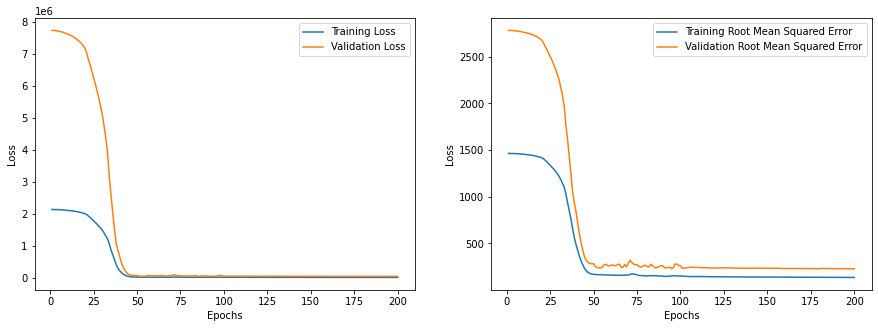

In [41]:
historyDict = ETH1to1Hist.history

loss = historyDict["loss"]
root_mean_squared_error = historyDict["root_mean_squared_error"]
valLoss = historyDict["val_loss"]
val_root_mean_squared_error = historyDict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, valLoss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

1/1 [==============================] - 0s 302ms/step
RMSE: 171.06803647479347
MAPE: 8.613982816072843


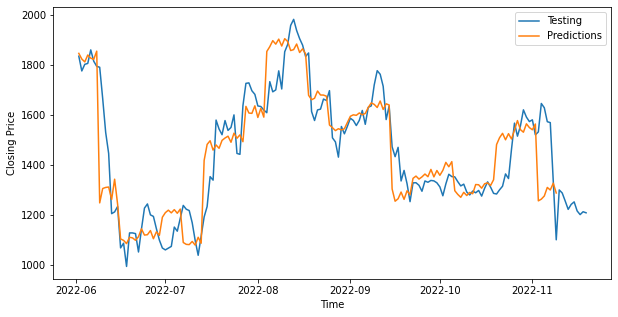

In [42]:
ETH_prediction = ETH1to1Model.predict(ETH_Test_X)
plt.figure(figsize = (10, 5))

plt.plot(ETH['Date'][ETH['Date'] >= '2022-06-02'], ETH['Close'][ETH['Date'] >= '2022-06-02'], label = 'Testing')
plt.plot(ETH['Date'][(ETH['Date'] >= '2022-06-02')&(ETH['Date'] <= '2022-11-09')], ETH_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

rmse = math.sqrt(mean_squared_error(ETH_Test_Y.reshape(-1,7), ETH_prediction))
mape = np.mean(np.abs(ETH_Test_Y.reshape(-1,7) - ETH_prediction )/np.abs(ETH_Test_Y.reshape(-1,7))) * 100
print(f'RMSE: {rmse}') #lower is better
print(f'MAPE: {mape}')

#### Model 2 to 1


##### Learning rate

In [12]:
def scheduler(epoch):

  if epoch < 100:
    lrate = 150 * (10 ** -6)
  else:
    lrate = 90 * (10 ** -6)

  return lrate

In [13]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

##### Training and testing

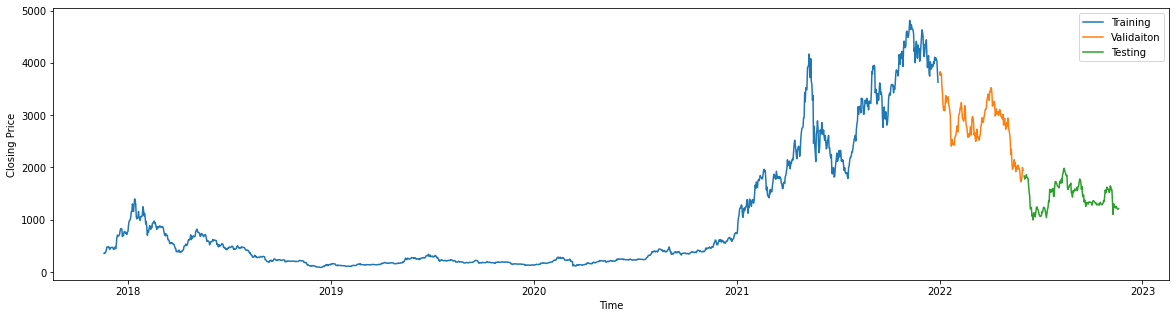

In [14]:
ETH["Date"] = pd.to_datetime(ETH["Date"])

ETH_Train_X, ETH_Train_Y, ETH_Val_X, ETH_Val_Y, ETH_Test_X, ETH_Test_Y = DatasetFor2to1(ETH, '2021-11-20')

plt.figure(figsize = (20, 5))
plt.plot(ETH['Date'][ETH['Date'] < '2021-12-30'], ETH['Close'][ETH['Date'] < '2021-12-30'], label = 'Training')
plt.plot(ETH['Date'][(ETH['Date'] >= '2022-01-01') & (ETH['Date'] < '2022-06-01')], ETH['Close'][(ETH['Date'] >= '2022-01-01') & (ETH['Date'] < '2022-06-01')], label = 'Validaiton')
plt.plot(ETH['Date'][ETH['Date'] >= '2022-06-02'], ETH['Close'][ETH['Date'] >= '2022-06-02'], label = 'Testing')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')


In [15]:
ETH2to1Model = Model2to1()
ETH2to1Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())
ETH2to1Hist = ETH2to1Model.fit(ETH_Train_X, ETH_Train_Y, epochs = 400, validation_data = (ETH_Val_X, ETH_Val_Y), callbacks = [callback])

Epoch 1/400
3/3 [==============================] - 6s 466ms/step - loss: 1968382.3750 - root_mean_squared_error: 1402.9906 - val_loss: 7024351.5000 - val_root_mean_squared_error: 2650.3494 - lr: 1.5000e-04
Epoch 2/400
3/3 [==============================] - 0s 96ms/step - loss: 1932201.2500 - root_mean_squared_error: 1390.0364 - val_loss: 7161637.5000 - val_root_mean_squared_error: 2676.1238 - lr: 1.5000e-04
Epoch 3/400
3/3 [==============================] - 0s 93ms/step - loss: 1945000.7500 - root_mean_squared_error: 1394.6329 - val_loss: 7136820.0000 - val_root_mean_squared_error: 2671.4827 - lr: 1.5000e-04
Epoch 4/400
3/3 [==============================] - 0s 65ms/step - loss: 1930010.8750 - root_mean_squared_error: 1389.2483 - val_loss: 7092873.0000 - val_root_mean_squared_error: 2663.2446 - lr: 1.5000e-04
Epoch 5/400
3/3 [==============================] - 0s 61ms/step - loss: 1928731.7500 - root_mean_squared_error: 1388.7878 - val_loss: 6896116.5000 - val_root_mean_squared_error: 2

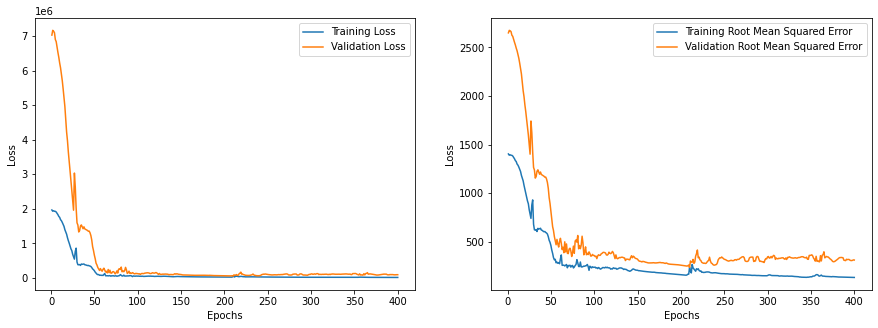

In [16]:
historyDict = ETH2to1Hist.history

loss = historyDict["loss"]
root_mean_squared_error = historyDict["root_mean_squared_error"]
valLoss = historyDict["val_loss"]
val_root_mean_squared_error = historyDict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, valLoss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

1/1 [==============================] - 0s 301ms/step


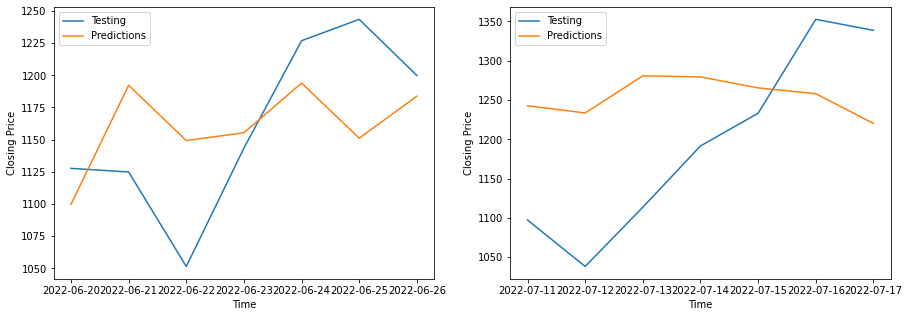

In [17]:

ETH_prediction = ETH2to1Model.predict(ETH_Test_X)

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(ETH['Date'][(ETH['Date'] >= '2022-06-20')&(ETH['Date'] <= '2022-06-26')], ETH['Close'][(ETH['Date'] >= '2022-06-20')&(ETH['Date'] <= '2022-06-26')], label = 'Testing')
ax1.plot(ETH['Date'][(ETH['Date'] >= '2022-06-20')&(ETH['Date'] <= '2022-06-26')], ETH_prediction[0].reshape(-1), label = 'Predictions')
ax1.set(xlabel = "Time", ylabel = "Closing Price")
ax1.legend()

ax2.plot(ETH['Date'][(ETH['Date'] >= '2022-07-11')&(ETH['Date'] <= '2022-07-17')], ETH['Close'][(ETH['Date'] >= '2022-07-11')&(ETH['Date'] <= '2022-07-17')], label = 'Testing')
ax2.plot(ETH['Date'][(ETH['Date'] >= '2022-07-11')&(ETH['Date'] <= '2022-07-17')], ETH_prediction[1].reshape(-1), label = 'Predictions')
ax2.set(xlabel = "Time", ylabel = "Closing Price")
ax2.legend()

plt.show()

In [18]:

rmse = math.sqrt(mean_squared_error(ETH_Test_Y.reshape(-1,7), ETH_prediction))
mape = np.mean(np.abs(ETH_Test_Y.reshape(-1,7) - ETH_prediction )/np.abs(ETH_Test_Y.reshape(-1,7))) * 100
print(f'RMSE: {rmse}') #lower is better
print(f'MAPE: {mape}')

RMSE: 196.73434031098563
MAPE: 10.31789677863432


#### Model 3 to 1

In [21]:
def scheduler3to1(epoch):

  if epoch < 150:
    lrate = 170 * (10 ** -6)
  else:
    lrate = 90 * (10 ** -6)

  return lrate

callback = tf.keras.callbacks.LearningRateScheduler(scheduler3to1)

ETH_Train_X, ETH_Train_Y, ETH_Val_X, ETH_Val_Y, ETH_Test_X, ETH_Test_Y = DatasetFor3to1(ETH, '2021-11-20')

ETH3to1Model = Model3to1()
ETH3to1Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())
ETH3to1Hist = ETH3to1Model.fit(ETH_Train_X, ETH_Train_Y, epochs = 400, validation_data = (ETH_Val_X, ETH_Val_Y), callbacks = [callback])

Epoch 1/400
2/2 [==============================] - 3s 438ms/step - loss: 2088639.2500 - root_mean_squared_error: 1445.2125 - val_loss: 7470922.5000 - val_root_mean_squared_error: 2733.2988 - lr: 1.7000e-04
Epoch 2/400
2/2 [==============================] - 0s 97ms/step - loss: 2041000.5000 - root_mean_squared_error: 1428.6359 - val_loss: 7436493.0000 - val_root_mean_squared_error: 2726.9934 - lr: 1.7000e-04
Epoch 3/400
2/2 [==============================] - 0s 105ms/step - loss: 2035588.5000 - root_mean_squared_error: 1426.7405 - val_loss: 7183859.0000 - val_root_mean_squared_error: 2680.2722 - lr: 1.7000e-04
Epoch 4/400
2/2 [==============================] - 0s 103ms/step - loss: 2016320.6250 - root_mean_squared_error: 1419.9720 - val_loss: 7162133.0000 - val_root_mean_squared_error: 2676.2161 - lr: 1.7000e-04
Epoch 5/400
2/2 [==============================] - 0s 98ms/step - loss: 1945529.6250 - root_mean_squared_error: 1394.8224 - val_loss: 7167291.0000 - val_root_mean_squared_error:

##### Training and testing

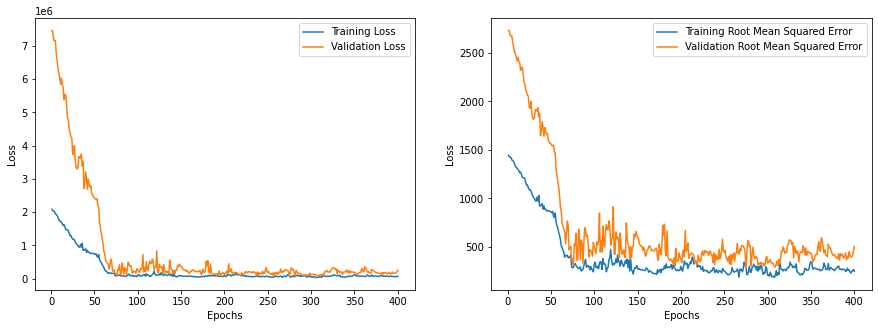

In [22]:
historyDict = ETH3to1Hist.history

loss = historyDict["loss"]
root_mean_squared_error = historyDict["root_mean_squared_error"]
valLoss = historyDict["val_loss"]
val_root_mean_squared_error = historyDict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, valLoss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()



1/1 [==============================] - 0s 296ms/step


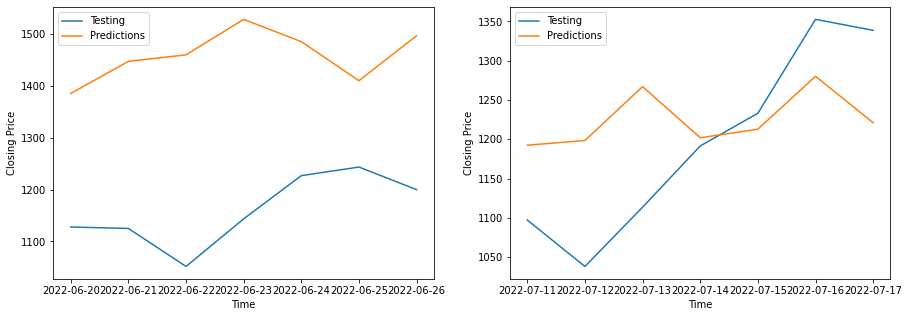

RMSE: 264.0825673726548
MAPE: 16.255192739157142


In [23]:
ETH_prediction = ETH3to1Model.predict(ETH_Test_X)

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(ETH['Date'][(ETH['Date'] >= '2022-06-20')&(ETH['Date'] <= '2022-06-26')], ETH['Close'][(ETH['Date'] >= '2022-06-20')&(ETH['Date'] <= '2022-06-26')], label = 'Testing')
ax1.plot(ETH['Date'][(ETH['Date'] >= '2022-06-20')&(ETH['Date'] <= '2022-06-26')], ETH_prediction[0].reshape(-1), label = 'Predictions')
ax1.set(xlabel = "Time", ylabel = "Closing Price")
ax1.legend()

ax2.plot(ETH['Date'][(ETH['Date'] >= '2022-07-11')&(ETH['Date'] <= '2022-07-17')], ETH['Close'][(ETH['Date'] >= '2022-07-11')&(ETH['Date'] <= '2022-07-17')], label = 'Testing')
ax2.plot(ETH['Date'][(ETH['Date'] >= '2022-07-11')&(ETH['Date'] <= '2022-07-17')], ETH_prediction[1].reshape(-1), label = 'Predictions')
ax2.set(xlabel = "Time", ylabel = "Closing Price")
ax2.legend()

plt.show()

rmse = math.sqrt(mean_squared_error(ETH_Test_Y.reshape(-1,7), ETH_prediction))
mape = np.mean(np.abs(ETH_Test_Y.reshape(-1,7) - ETH_prediction )/np.abs(ETH_Test_Y.reshape(-1,7))) * 100
print(f'RMSE: {rmse}') #lower is better
print(f'MAPE: {mape}')

#### Model 4 to1


In [32]:
def scheduler4to1(epoch):

  #if epoch < 150:
   # lrate = 120 * (10 ** -6)
  #else:
   # lrate = 50 * (10 ** -6)

  if epoch <= 100:
    lrate = 100 * (10 ** -6)
  else:
    lrate = 20 * (10 ** -6)

  return lrate

callback = tf.keras.callbacks.LearningRateScheduler(scheduler4to1)

ETH_Train_X, ETH_Train_Y, ETH_Val_X, ETH_Val_Y, ETH_Test_X, ETH_Test_Y = DatasetFor4to1(ETH, '2021-11-20')

ETH4to1Model = Model4to1()
ETH4to1Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())
ETH4to1Hist = ETH4to1Model.fit(ETH_Train_X, ETH_Train_Y, epochs = 400, validation_data = (ETH_Val_X, ETH_Val_Y), callbacks = [callback])

42
42
4
4
4
4
Epoch 1/400
2/2 [==============================] - 3s 481ms/step - loss: 1912932.2500 - root_mean_squared_error: 1383.0879 - val_loss: 6197063.5000 - val_root_mean_squared_error: 2489.3901 - lr: 1.0000e-04
Epoch 2/400
2/2 [==============================] - 0s 121ms/step - loss: 1911531.0000 - root_mean_squared_error: 1382.5812 - val_loss: 5904075.0000 - val_root_mean_squared_error: 2429.8303 - lr: 1.0000e-04
Epoch 3/400
2/2 [==============================] - 0s 120ms/step - loss: 1856482.5000 - root_mean_squared_error: 1362.5280 - val_loss: 5922196.5000 - val_root_mean_squared_error: 2433.5564 - lr: 1.0000e-04
Epoch 4/400
2/2 [==============================] - 0s 119ms/step - loss: 1796685.8750 - root_mean_squared_error: 1340.4052 - val_loss: 5927156.5000 - val_root_mean_squared_error: 2434.5752 - lr: 1.0000e-04
Epoch 5/400
2/2 [==============================] - 0s 111ms/step - loss: 1813875.3750 - root_mean_squared_error: 1346.8019 - val_loss: 5999616.5000 - val_root_mea

##### Training and testing

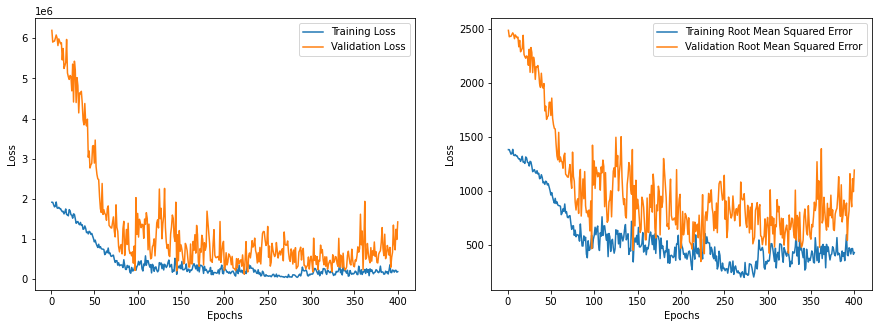

In [33]:
historyDict = ETH4to1Hist.history

loss = historyDict["loss"]
root_mean_squared_error = historyDict["root_mean_squared_error"]
valLoss = historyDict["val_loss"]
val_root_mean_squared_error = historyDict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, valLoss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

1/1 [==============================] - 0s 294ms/step


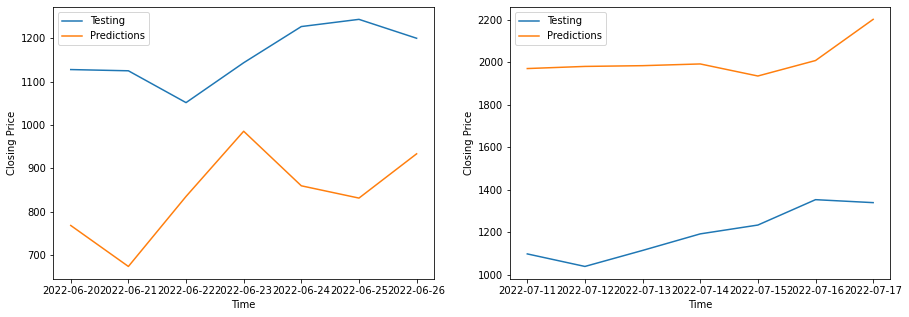

RMSE: 320.9320266286526
MAPE: 21.477568036673155


In [34]:
ETH_prediction = ETH4to1Model.predict(ETH_Test_X)

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(ETH['Date'][(ETH['Date'] >= '2022-06-20')&(ETH['Date'] <= '2022-06-26')], ETH['Close'][(ETH['Date'] >= '2022-06-20')&(ETH['Date'] <= '2022-06-26')], label = 'Testing')
ax1.plot(ETH['Date'][(ETH['Date'] >= '2022-06-20')&(ETH['Date'] <= '2022-06-26')], ETH_prediction[0].reshape(-1), label = 'Predictions')
ax1.set(xlabel = "Time", ylabel = "Closing Price")
ax1.legend()

ax2.plot(ETH['Date'][(ETH['Date'] >= '2022-07-11')&(ETH['Date'] <= '2022-07-17')], ETH['Close'][(ETH['Date'] >= '2022-07-11')&(ETH['Date'] <= '2022-07-17')], label = 'Testing')
ax2.plot(ETH['Date'][(ETH['Date'] >= '2022-07-11')&(ETH['Date'] <= '2022-07-17')], ETH_prediction[1].reshape(-1), label = 'Predictions')
ax2.set(xlabel = "Time", ylabel = "Closing Price")
ax2.legend()

plt.show()

rmse = math.sqrt(mean_squared_error(ETH_Test_Y.reshape(-1,7), ETH_prediction))
mape = np.mean(np.abs(ETH_Test_Y.reshape(-1,7) - ETH_prediction )/np.abs(ETH_Test_Y.reshape(-1,7))) * 100
print(f'RMSE: {rmse}') #lower is better
print(f'MAPE: {mape}')

#### As the result of the experiment the best  input shape for the model in our case is 1 to 1 or one week data in one week prediction out. 